## Loan prediction model

### Descriptive analyze for "loan prediction" data

#### Importing Libraries

In [220]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [169]:
df = pd.read_csv('./loanstatus.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

Our dataset contains 614 rows and 13columns

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
#checking missing values
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [25]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002925,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [146]:
#handling missing value
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
    if c==object:
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])

In [147]:
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

In [148]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [149]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [150]:
cat_data.isnull().sum().sort_values(ascending=False)

Self_Employed    32
Dependents       15
Gender           13
Married           3
Loan_Status       0
Property_Area     0
Education         0
Loan_ID           0
dtype: int64

In [151]:
#for categorical columns : replace the missing values with with the most frequent category.
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [152]:
cat_data.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [153]:
num_data.isnull().sum().sort_values(ascending=False)

Credit_History       50
LoanAmount           22
Loan_Amount_Term     14
CoapplicantIncome     0
ApplicantIncome       0
dtype: int64

In [154]:
#for numerical columns : replace with the value of the previous row.
num_data=num_data.fillna(method='bfill')

In [155]:
num_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [156]:
target_value={'Y':1,'N':0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)

In [157]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001002,Male,No,0,Graduate,No,Urban
1,LP001003,Male,Yes,1,Graduate,No,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,Urban
4,LP001008,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural
610,LP002979,Male,Yes,3+,Graduate,No,Rural
611,LP002983,Male,Yes,1,Graduate,No,Urban
612,LP002984,Male,Yes,2,Graduate,No,Urban


In [158]:
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [168]:
# replace categorical columns with numerical ones 0,1,2,3
le=LabelEncoder()
for i in cat_data:
    cat_data[i]=le.fit_transform(cat_data[i])

In [170]:
#Delete Load_id
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [268]:
#Concatenate cat_data and num_data with target column
X=pd.concat([cat_data,num_data],axis=1)
y=target
df = pd.concat([cat_data,num_data,target],axis=1)

### Data visualization

In [183]:
target.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

The percentage of credits granted is: 0.6872964169381107
The percentage of credits non-granted is: 0.3127035830618892


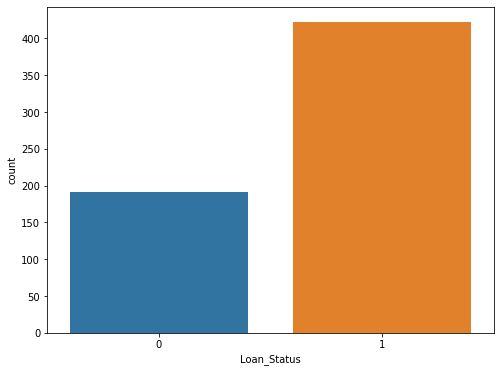

In [184]:
plt.figure(figsize=(8,6))
sns.countplot(target)
yes=target.value_counts()[1]/len(target)
no=target.value_counts()[0]/len(target)
print(f'The percentage of credits granted is: {yes}')
print(f'The percentage of credits non-granted is: {no}')

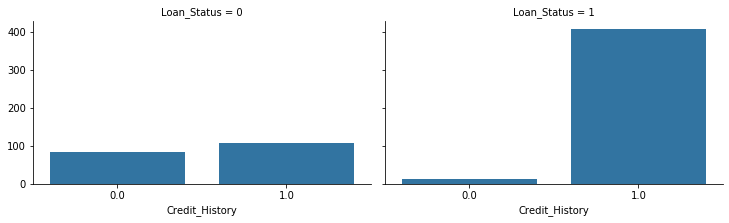

In [192]:
#Credit history
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Credit_History')

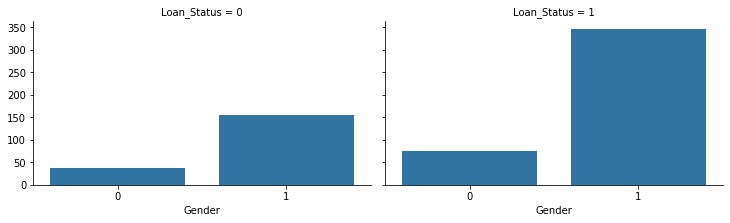

In [193]:
#Gender
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Gender')

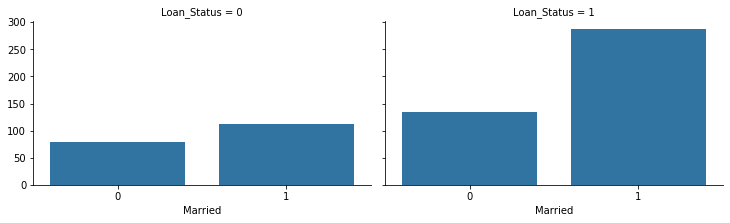

In [194]:
#Family status
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Married')

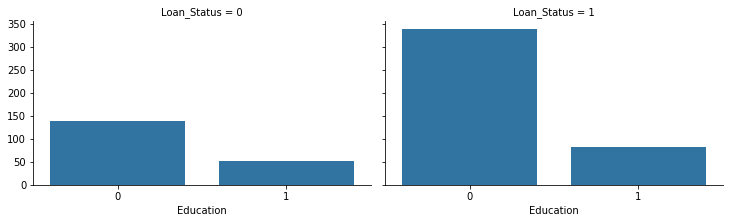

In [195]:
#Education
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Education')

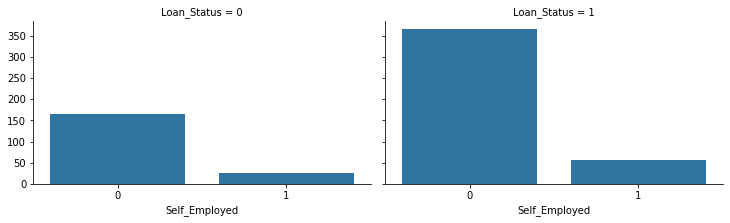

In [215]:
#Self Employed
grid=sns.FacetGrid(df,col='Loan_Status',height=3.2,aspect=1.6)
grid.map(sns.countplot,'Self_Employed')

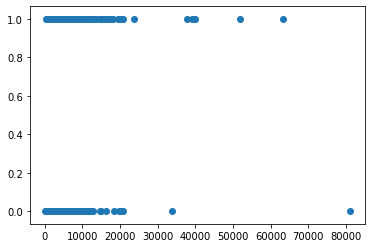

In [198]:
#Income
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

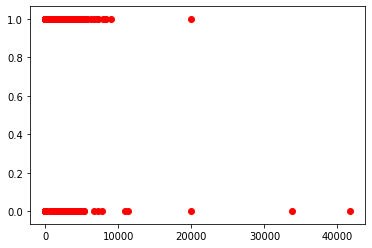

In [201]:
#CoApplicantIncome
plt.scatter(df['CoapplicantIncome'],df['Loan_Status'],c='red')

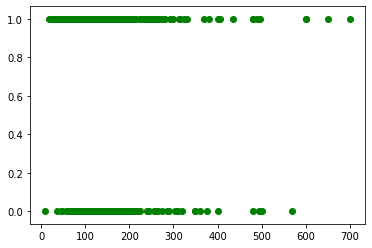

In [216]:
#LoanAmount
plt.scatter(df['LoanAmount'],df['Loan_Status'],c='green')

In [219]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1,1,0,0,0,1,3833.5,268.0,132.5,360.0,1.0
1,1,1,0,0,0,1,3812.5,1239.5,127.5,360.0,1.0


### Model building

In [269]:
#Split the dataset for : training data and testing data
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X,y):
    X_train,X_test=X.iloc[train],X.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]

In [270]:
print(f'X_train taille: {X_train.shape}')
print(f'X_test taille: {X_test.shape}')
print(f'y_train taille: {y_train.shape}')
print(f'y_test taille: {y_test.shape}')

X_train taille: (491, 11)
X_test taille: (123, 11)
y_train taille: (491,)
y_test taille: (123,)


In [223]:
# 3 algorithms for classification : Logistic Regession, KNN, DesicionTree

#### Importing libraries for applying the model

In [262]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [272]:
#Defining models
models={
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
}
#accuracy function
def accuracy(y_true,y_pred,retu=False):
    acc=accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'the model accuracy is:{acc}')
#models application
def train_test_eval(models,X_train,y_train,X_test,y_test):
    for name,model in models.items():
        print(name,':')
        model.fit(X_train,y_train)
        accuracy(y_test,model.predict(X_test))
        print('--'*30)
        
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
the model accuracy is:0.8536585365853658
------------------------------------------------------------
KNeighborsClassifier :
the model accuracy is:0.6504065040650406
------------------------------------------------------------
DecisionTreeClassifier :
the model accuracy is:0.8455284552845529
------------------------------------------------------------


C:\Users\amal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [306]:
X_2=X[['Credit_History','CoapplicantIncome','Education']]

In [307]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X_2,y):
    X_train,X_test=X_2.iloc[train],X_2.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]
print(f'X_train taille: {X_train.shape}')
print(f'X_test taille: {X_test.shape}')
print(f'y_train taille: {y_train.shape}')
print(f'y_test taille: {y_test.shape}')

X_train taille: (491, 3)
X_test taille: (123, 3)
y_train taille: (491,)
y_test taille: (123,)


In [308]:
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
the model accuracy is:0.8536585365853658
------------------------------------------------------------
KNeighborsClassifier :
the model accuracy is:0.6991869918699187
------------------------------------------------------------
DecisionTreeClassifier :
the model accuracy is:0.8455284552845529
------------------------------------------------------------


The best classifier in this case is : Logistic Regression

In [310]:
Classifier = LogisticRegression()
Classifier.fit(X_2,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### *and that's ;)*